In [1]:
import os 
import glob

import numpy as np
import xarray as xr
import pandas as pd

from datetime import datetime, timedelta

In [3]:
path = '/uio/lagringshotell/geofag/projects/miphclac/hannasv/'
save_dir = '/uio/lagringshotell/geofag/projects/miphclac/hannasv/fractions_repo/'

years = np.arange(2004, 2018)
months = np.arange(1, 13)

In [4]:
def timestamp(filename):
    """
    Returns the numpy datetime 64 [ns] for the current date.
    This is a bit hardcoded at the moment ...
    """
    splits = filename.split('-')
    ts = splits[5]
    year = ts[:4]
    month = ts[4:6]
    day = ts[6:8]
    hr = ts[8:10]
    minuts = ts[10:12]
    sek = ts[12:14]
    # TODO make sure all filenames have seconds
    return np.datetime64( year+"-"+month+"-"+day+"T"+hr+":00:00"+".000000").astype(str)

In [5]:
def make_folder_str(month, year):
    """ Generates the folder search str
    month : int
    year : int
    
    Returns : str
        year_month
    """
    
    month = "%2.2d" % month
    return "{}_{}".format(year, month)

In [6]:
def get_missing_vals(folder):
    """Returns missing timesteps in folder."""
    year, month = folder.split('_')
    year  = int(year)
    month = int(month)
    
    if month < 12:
        next_m = month + 1
    else:
        next_m = 1
        
    t = np.arange(datetime(year,month,1), datetime(year,next_m,1), timedelta(hours=1)).astype(str)
    folder = make_folder_str(month, year)
    files_in_folder = glob.glob(os.path.join(path, folder, '*grb'))
    times = [timestamp(fil) for fil in files_in_folder]
    a = times 
    b = t
    c = [x for x in a if x not in b]+[x for x in b if x not in a]
    return c

In [8]:
folder = '2015_05'

In [9]:
get_missing_vals(folder)

[]

In [10]:
files_in_folder = glob.glob(os.path.join(path, folder, '*grb'))
times = [timestamp(fil) for fil in files_in_folder]

In [11]:
def timestamp_to_file_search_str(timestamp):
    splits = [split.split('T') for split in timestamp.split(':')[0].split('-')]
    s = ''
    for a in np.concatenate(splits):
        s+=a
    return s

In [12]:
timestamp_to_file_search_str('2004-08-01T15')

'2004080115'

In [13]:
'2004-08-26T02:00:00.000000'

'2004-08-26T02:00:00.000000'

In [14]:
def removes_duplicates(year, month):
    folder = make_folder_str(month, year)
    files_in_folder = glob.glob(os.path.join(path, folder, '*grb'))

    if np.unique(times) != len(times):
        keeping = []
        missing = []
        for fil in files_in_folder:
            # if timestep is already there don't append
            search_for = timestamp_to_file_search_str(timestamp(fil))
            files =  glob.glob(os.path.join(path, folder, '*-{}*grb'.format(search_for)))  
            if len(files) > 0:
                keeping.append(files[0]) # only keep the first one for multiple files of the same data

In [15]:
def find_correct_fraction_file_and_add_regridded():
    """
    
    
    """
    pass

In [16]:
# len(get_missing_vals(make_folder_str(year=y, month=m)

In [17]:
files = ['2004_04.nc', '2004_06.nc', '2004_08.nc', '2004_10.nc', '2004_12.nc', '2005_06.nc', 
'2005_08.nc', '2005_10.nc', '2005_12.nc',  '2006_02.nc',
'2004_05.nc', '2004_07.nc', '2004_09.nc', '2004_11.nc', '2005_05.nc', '2005_07.nc', 
'2005_09.nc', '2005_11.nc', '2006_01.nc']


In [18]:
for fil in files:
    data = xr.open_dataset(os.path.join(save_dir, fil))
    print(data)
    print(' ')

<xarray.Dataset>
Dimensions:    (latitude: 81, longitude: 161, time: 690)
Coordinates:
  * time       (time) datetime64[ns] 2004-04-02 ... 2004-04-30T23:00:00
  * latitude   (latitude) float64 30.0 30.25 30.5 30.75 ... 49.5 49.75 50.0
  * longitude  (longitude) float64 -15.0 -14.75 -14.5 -14.25 ... 24.5 24.75 25.0
Data variables:
    tcc        (time, latitude, longitude) float64 ...
    nr_nans    (time, latitude, longitude) float64 ...
 
<xarray.Dataset>
Dimensions:    (latitude: 81, longitude: 161, time: 716)
Coordinates:
  * time       (time) datetime64[ns] 2004-06-01 ... 2004-06-30T23:00:00
  * latitude   (latitude) float64 30.0 30.25 30.5 30.75 ... 49.5 49.75 50.0
  * longitude  (longitude) float64 -15.0 -14.75 -14.5 -14.25 ... 24.5 24.75 25.0
Data variables:
    tcc        (time, latitude, longitude) float64 ...
    nr_nans    (time, latitude, longitude) float64 ...
 
<xarray.Dataset>
Dimensions:    (latitude: 81, longitude: 161, time: 741)
Coordinates:
  * time       (time) dat

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.heatmap(data.tcc.isel(time = 2).values)
plt.show()

# Testing : 

In [19]:
path = '/uio/lagringshotell/geofag/projects/miphclac/hannasv/'
save_dir = '/uio/lagringshotell/geofag/projects/miphclac/hannasv/fractions_repo/'

In [20]:
years = np.arange(2004, 2019)
months = np.arange(1, 13)

In [21]:
def add_file_to_existing(filename,
                         lat = np.arange(30.0, 50.25, 0.25),
                         lon = np.arange(-15.0, 25.25, 0.25)):
    
    # Find folder to add it to
    target_fil = get_fraction_file(filename)
    ds = xr.open_dataset(target_fil)

    """ grib_files : list of files. One month. """
    data_grid = get_dict_with_all_keys()

    counter = 0

    cloud_fraction, nans = compute(filename, lat, lon)
    new_ds = xr.Dataset({'tcc': (['latitude', 'longitude'],  cloud_fraction),
                         'nr_nans':(['latitude', 'longitude'], nans),
                        },
                          coords={'longitude': (['longitude'], lon),
                                  'latitude': (['latitude'], lat),
                                   })

    ts = timestamp(filename)
    new_ds['time'] = ts

    # Add time as a coordinate and dimension.
    new_ds = new_ds.assign_coords(time = new_ds.time)
    new_ds = new_ds.expand_dims(dim = 'time')

    try:
        ds = ds.merge(new_ds)
    except xr.MergeError:
        # Happens if MS1 and MS2 have taken a image at the same time
        print("Filename not included {}".format(filename))
    logging.debug('Finished added {} to {}.'.format())
        #print("completed {}/{} files".format(counter, len(grb_files)))
    return ds


In [22]:
test_fil = 'MSG4-SEVI-MSGCLMK-0100-0100-20190203040000.000000000Z-20190203041358-1375012.grb'

In [23]:
def get_fraction_file(filename):
    """ Raw filename.
    """
    a = filename.split('-')[5].split('.')[0][:6]
    target_fil = a[:4]+'_'+a[4:]+'.nc'
    path = '/uio/lagringshotell/geofag/projects/miphclac/hannasv/fractions_repo/'
    
    return os.path.join(path, target_fil)


In [ ]:
all_dates = []
for y in np.arange(2004, 2019):
    for m in np.arange(1, 13):
        if not (y == 2004 and m < 3):
            folder = make_folder_str(m, y)
            dates = get_missing_vals(folder)
            all_dates += dates
            #if len(dates) > 0:

In [ ]:
file1 = open("missing_values2.txt","w") 
all_dates = []
for y in np.arange(2004, 2019):
    for m in np.arange(1, 13):
        if not (y == 2004 and m < 3):
            folder = make_folder_str(m, y)
            dates = get_missing_vals(folder)
            all_dates += dates
            #if len(dates) > 0:
            #    for d in dates:
            #        file1.write(d)
            #        file1.write('\n')
file1.close()

In [10]:
import matplotlib.pyplot as plt

In [ ]:
len(all_dates)

In [14]:
aa = np.array(all_dates, dtype='datetime64[ns]')

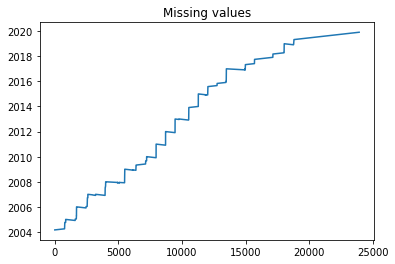

In [16]:
plt.plot(aa)
plt.title('Missing values')
plt.show()

# Sort into singles and periods

In [ ]:
np.unique(all_dates)

In [18]:
np.timedelta64?

Docstring: <no docstring>
File:      ~/anaconda3/lib/python2.7/site-packages/numpy/__init__.py
Type:      type


In [21]:
dt = np.timedelta64(1, 'h')

In [22]:
dt

numpy.timedelta64(1,'h')

In [32]:
abs(aa[0]-aa[1]) == np.timedelta64(1, 'h')

True

In [ ]:
periods = []
single = []
aa = np.sort(np.array(all_dates, dtype='datetime64[ns]'))
dt =  np.timedelta64(1, 'h')

In [43]:
periods = []
single = []
aa = np.sort(np.array(all_dates, dtype='datetime64[ns]'))
dt =  np.timedelta64(1, 'h')

# trenger start, stop for å lagre en periode
for i, val in enumerate(aa):
    
    if i == 0:
        prev = val
        start = val
    
    elif i < len(aa)-1: # not the end
        # if sequence
        part_of_seq = (abs(val - prev) == dt)
        if part_of_seq: # midle
            # part of sequence
            sequence = True
            prev = val
            
        # if not sequence
        else:
            # Either last element or single
            # 1) If the end of sequence
            if sequence:
                assert prev > start, 'noo'
                period = '{}-{}'.format(start, prev)
                periods.append(period)
                prev = val
                #start = val
                sequence = False
            else:
                
                # 2) If start of sequence. 
                if aa[i+1] - val == dt:
                    prev = val
                    start = val
                    sequence = True
                else:
                    # 3) If single
                    single.append(start)
                    prev = val
                    start = val
                    sequence = False
                
    else:
        period = '{}-{}'.format(start, prev)
        periods.append(period)
            

In [44]:
single

[numpy.datetime64('2004-06-23T05:00:00.000000000'),
 numpy.datetime64('2005-03-06T13:00:00.000000000'),
 numpy.datetime64('2005-03-15T11:00:00.000000000'),
 numpy.datetime64('2005-05-27T16:00:00.000000000'),
 numpy.datetime64('2005-06-20T12:00:00.000000000'),
 numpy.datetime64('2005-06-20T20:00:00.000000000'),
 numpy.datetime64('2006-02-02T00:00:00.000000000'),
 numpy.datetime64('2006-03-08T19:00:00.000000000'),
 numpy.datetime64('2006-08-01T22:00:00.000000000'),
 numpy.datetime64('2006-12-31T23:00:00.000000000'),
 numpy.datetime64('2007-07-18T10:00:00.000000000'),
 numpy.datetime64('2007-07-18T14:00:00.000000000'),
 numpy.datetime64('2007-07-19T15:00:00.000000000'),
 numpy.datetime64('2007-07-30T14:00:00.000000000'),
 numpy.datetime64('2007-08-31T23:00:00.000000000'),
 numpy.datetime64('2007-11-19T06:00:00.000000000'),
 numpy.datetime64('2007-12-31T23:00:00.000000000'),
 numpy.datetime64('2008-10-20T04:00:00.000000000'),
 numpy.datetime64('2008-11-10T12:00:00.000000000'),
 numpy.datet

In [42]:
periods

['2004-03-01T00:00:00.000000000-2004-04-01T23:00:00.000000000',
 '2004-04-07T02:00:00.000000000-2004-04-07T07:00:00.000000000',
 '2004-06-14T12:00:00.000000000-2004-06-14T13:00:00.000000000',
 '2004-08-26T02:00:00.000000000-2004-08-26T03:00:00.000000000',
 '2004-10-04T07:00:00.000000000-2004-10-07T10:00:00.000000000',
 '2004-12-01T00:00:00.000000000-2004-12-03T02:00:00.000000000',
 '2004-12-03T04:00:00.000000000-2004-12-31T23:00:00.000000000',
 '2005-01-10T14:00:00.000000000-2005-01-14T09:00:00.000000000',
 '2005-04-18T04:00:00.000000000-2005-04-18T12:00:00.000000000',
 '2005-05-27T01:00:00.000000000-2005-05-27T02:00:00.000000000',
 '2005-12-01T00:00:00.000000000-2005-12-31T23:00:00.000000000',
 '2006-01-09T14:00:00.000000000-2006-01-13T08:00:00.000000000',
 '2006-03-23T00:00:00.000000000-2006-03-23T02:00:00.000000000',
 '2006-05-18T13:00:00.000000000-2006-05-18T18:00:00.000000000',
 '2006-09-23T15:00:00.000000000-2006-09-25T05:00:00.000000000',
 '2006-12-01T00:00:00.000000000-2006-12-